## Regression Analysis- Internship task 4


### Step 1: Import necessary libraries

In [68]:
!pip install kaggle
!pip install kagglehub

In [69]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Selection

In [70]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sukhmandeepsinghbrar/house-prices-india")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sukhmandeepsinghbrar/house-prices-india/versions/1


In [71]:
os.listdir(path)

['House Price India.csv']

### Step2: Data Pre-Processing
#### Inspect the dataset


In [72]:

file_path = os.path.join(path, "House Price India.csv")
df = pd.read_csv(file_path)
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [73]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [74]:
print(f"Dataset Shape: {df.shape}")
print("\nColumn Data Types:\n", df.dtypes)

Dataset Shape: (14619, 23)

Column Data Types:
 id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov       

In [75]:
#Check for missing values and duplicates
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())




Missing Values:
 id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                               

In [76]:
df = df.dropna()

In [77]:
# Drop unnecessary columns
columns_to_drop = [
    'number of bedrooms', 'number of bathrooms', 'living area', 'Postal Code',
    'waterfront present', 'number of views', 'Lattitude', 'Date','Longitude'
]
df = df.drop(columns=columns_to_drop)

In [78]:
# Verify the updated dataset
print(df.head())
print(df.columns)

           id  lot area  number of floors  condition of the house  \
0  6762810635      4000               1.5                       5   
1  6762810998      9480               1.5                       3   
2  6762812605     42998               2.0                       3   
3  6762812919      4500               1.5                       4   
4  6762813105      4750               1.0                       4   

   grade of the house  Area of the house(excluding basement)  \
0                   8                                   1910   
1                   8                                   2910   
2                   9                                   3310   
3                   8                                   1880   
4                   9                                   1700   

   Area of the basement  Built Year  Renovation Year  living_area_renov  \
0                  1010        1909                0               2470   
1                     0        1939               

### Distribution of House Prices

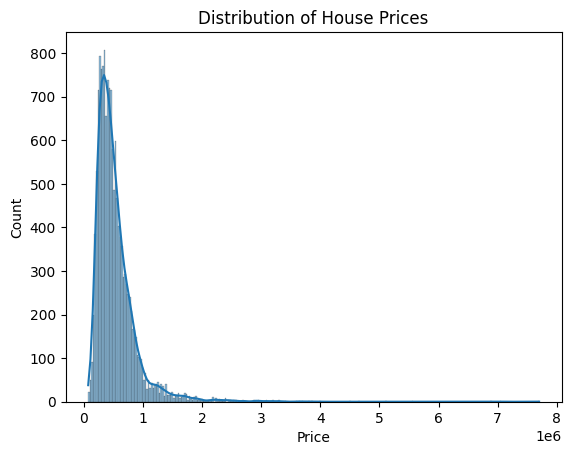

In [79]:
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

### Distribution of House Sizes

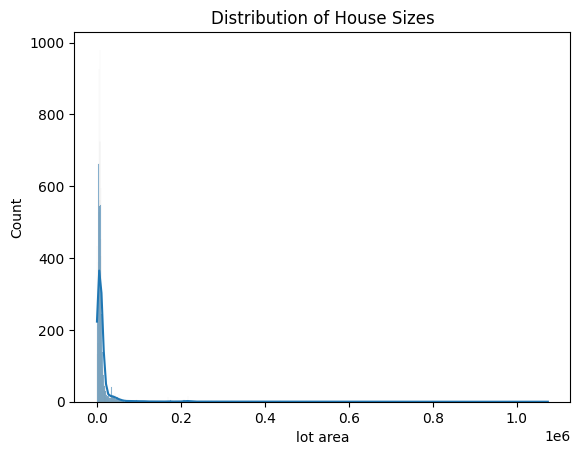

In [80]:
sns.histplot(df['lot area'], kde=True)
plt.title('Distribution of House Sizes')
plt.show()



###  Step 2: Data Pre-Processing
#### Normalization of variables

In [81]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for standardization
numerical_features = [
    'lot area', 'number of floors', 'Area of the house(excluding basement)',
    'Area of the basement', 'Built Year', 'Renovation Year',
    'living_area_renov', 'lot_area_renov', 'Number of schools nearby',
    'Distance from the airport'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify standardization
print(df[numerical_features].head())

   lot area  number of floors  Area of the house(excluding basement)  \
0 -0.292558         -0.004305                               0.129929   
1 -0.148042         -0.004305                               1.329389   
2  0.735881          0.921239                               1.809172   
3 -0.279373         -0.004305                               0.093946   
4 -0.272780         -0.929849                              -0.121957   

   Area of the basement  Built Year  Renovation Year  living_area_renov  \
0              1.590720   -2.099975        -0.218469           0.684979   
1             -0.660973   -1.082707        -0.218469           1.365099   
2             -0.660973    1.019648        -0.218469           1.958395   
3              1.189428   -1.421796        -0.218469           0.091683   
4              1.345486   -0.675799        -0.218469           0.554744   

   lot_area_renov  Number of schools nearby  Distance from the airport  
0       -0.335939                 -0.014982

###  Step 3: Feature Selection

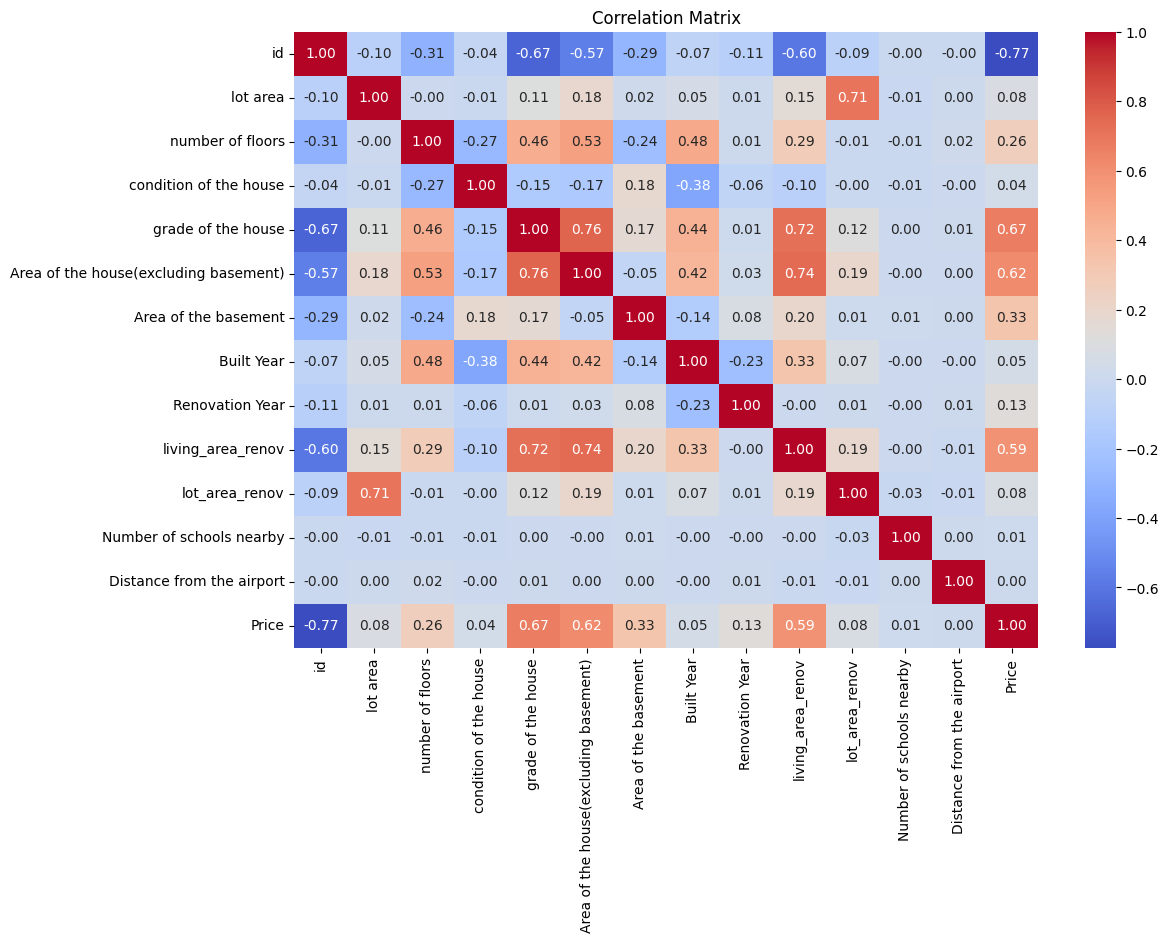

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Step 4: Model Training

In [83]:
# Select features with high correlation to the target variable (Price)
selected_features = [
    'lot area', 'number of floors', 'Area of the house(excluding basement)',
    'Area of the basement', 'Built Year', 'Renovation Year',
    'Number of schools nearby', 'Distance from the airport'
]

# Define predictors (X) and target (y)
X = df[selected_features]
y = df['Price']

### 4.1 Train-Test Split

In [84]:
from sklearn.model_selection import train_test_split


# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (11695, 8)
Testing data shape: (2924, 8)


### 4.2: Train a Linear Regression Model

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

###  4.3: Make Predictions

In [86]:
# Make predictions
y_pred = model.predict(X_test)

# Display predicted vs actual prices
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(results.head())

       Actual Price  Predicted Price
7983         546800    517169.812514
6466         550000    572000.909895
10306        399950    450320.151972
1217         940000    767663.266828
12463        545000    756037.208462


### Step 5: Model Evaluation

Root Mean Squared Error (RMSE): 253886.61123828887
R² (Coefficient of Determination): 0.5644586327634824


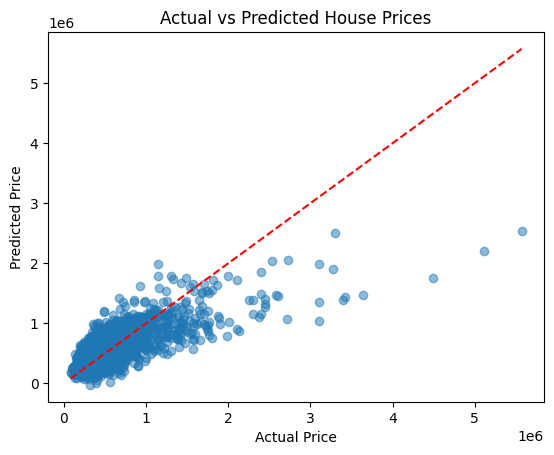

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R² (Coefficient of Determination): {r2}')

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

### 5.1 Feature Importance

In [88]:
# Get feature coefficients
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
})

# Sort by absolute value of coefficients
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients)

                                 Feature    Coefficient  Absolute Coefficient
2  Area of the house(excluding basement)  246937.790269         246937.790269
3                   Area of the basement  128456.871858         128456.871858
4                             Built Year  -82380.377852          82380.377852
1                       number of floors   35658.647511          35658.647511
5                        Renovation Year   14612.030683          14612.030683
0                               lot area  -14504.342502          14504.342502
6               Number of schools nearby    4501.647399           4501.647399
7              Distance from the airport    2053.480670           2053.480670
